<!--NOTEBOOK_HEADER-->
*This notebook contains material from [cbe61622](https://jckantor.github.io/cbe61622);
content is available [on Github](https://github.com/jckantor/cbe61622.git).*


<!--NAVIGATION-->
< [3.0 Analog Measurement](https://jckantor.github.io/cbe61622/03.00-Analog-Measurement.html) | [Contents](toc.html) | [3.2 Sampling Continuous Time Signals](https://jckantor.github.io/cbe61622/03.02-Sampling-Continuous-Time-Signals.html) ><p><a href="https://colab.research.google.com/github/jckantor/cbe61622/blob/master/docs/03.01-Low-Level-Measurment.ipynb"> <img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a><p><a href="https://jckantor.github.io/cbe61622/03.01-Low-Level-Measurment.ipynb"> <img align="left" src="https://img.shields.io/badge/Github-Download-blue.svg" alt="Download" title="Download Notebook"></a>

# 3.1 Low-Level Measurement

## 3.1.1 References

* [Low Level Measurements Handbook - 7th Edition (Kiethley)](https://download.tek.com/document/LowLevelHandbook_7Ed.pdf)
* [Art of Electronics, Chapter 8]

## 3.1.2 Limits to Measurements

Sources of noise

White noise:

* *Shot noise* from the discrete nature of charge carriers
* *Johnson noise* caused by thermal fluctuations

Other noise:

* *Flicker 1/f noise* from a variety of sources
* .... and many more!



### 3.1.2.1 Shot Noise

* Description and theory, Walter Schottky, 1918. 
* [Poisson Process - Wolfram MathWorld](https://mathworld.wolfram.com/PoissonProcess.html)

Shot noise is the noise due to descrete nature of electric charge. Shot noise can be modeled as a Poisson process. A fundamental consideration in electrical and optical devices including photography.

In a Poisson process:

* Poisson processes model the occurrence of independent events that occur one at a time.
* The probability of exactly one event in a sufficiently short interval $h$ is $P = \nu h$ where the constant $\nu$ is the average rate of events.
* Each interval is a Bernoulli trial. The number of events in a time period is given by

$$P(k) = \frac{(\nu h)^k}{k!} e^{-\nu h}$$
* $\mu = \nu h$ is the expected number of events in the interval $h$
* $\sigma^2 = \nu h$ is also the variance in the number of events in interval $h$.
* The waiting time between events follows an exponential distribution. The probability of waiting longer than $t$ is 

$$P(t > h) = e^{-\nu h}$$

or less that $t$

$$P(t \leq h) = 1 - e^{-\nu h}$$

This last expression is the cumulative distribution function. The probably density function is the derivative

$$f(h) = \nu e ^ {-\nu h}$$

**Frequency domain**

[A frequency-domain derivation of shot noise](https://core.ac.uk/download/pdf/33125817.pdf)

$$i_{noise} = \sqrt{2 q I_{dc}}$$

where $q = 1/C$ is the electron charge $1.60\times 10^{-19}$ C.

**Signal to Noise Ratio**

Signal to noise ratio is normally expressed as the power of the signal divided by the power of the noise. 

$$\text{SNR} = \frac{\mu^2}{\sigma^2}$$

If the interval is $\delta t$ the current is $I$, rate of charge carriers is $C I h$ where $C$ is Coulomb constant. The SNR is then

$$\text{SNR} = \frac{(C I \delta t)^2}{C I \delta t} = C I \delta t$$

Question: Suppose you need 5 sigma accuracy (i.e, $\frac{\mu}{\sigma} > 5$) and are measuring a 1 nA signal, what is the fastest sampling rate you can expect?

**Simulated Photon Noise**

A sequence of images in which the average number of photons captured per pixel increases by factors of 10x between images. [source](https://commons.wikimedia.org/wiki/File:Photon-noise.jpg)

![](https://upload.wikimedia.org/wikipedia/commons/4/42/Photon-noise.jpg)


Question:

1. Which image has the most noise?
2. Which image has the lower signal to noise ratio?

nu = 6241509.074 electrons per second
expected number of electrons per step nu*h = 6.241509074


Text(0.5, 0, 'seconds')

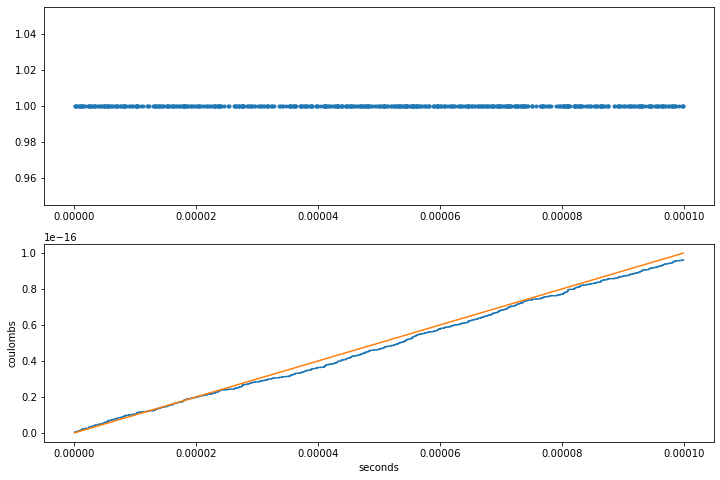

In [57]:
# Demonstration
# 
# Simulate shot noise for a 1 pA current

%matplotlib inline

import random
import math
import numpy as np
import matplotlib.pyplot as plt

# constants
C = 6.241509074e18     # number of electrons in a Coulomb
I = 1e-12              # 1 pA of current
h = 1e-6               # 1 microsecond

nu = C*I
print("nu =", nu, "electrons per second") 
print("expected number of electrons per step nu*h =", nu*h)

K = 600

# simulate arrival of K charge carriers
dt = np.random.exponential(1/nu, size=(K))
t = np.cumsum(dt)

# plot results
y = np.array([1]*len(t))

fig, ax = plt.subplots(2, 1, figsize=(12, 8))
ax[0].plot(t, y, '.')

ax[1].step(t, np.cumsum(y)/C, where="pre")
ax[1].plot(t, I*t)
ax[1].set_ylabel('coulombs')
ax[1].set_xlabel('seconds')

### 3.1.2.2 Johnson-Nyquist Noise

* Discovered and measured by John B. Johnson, Bell Labs, 1926
* Explained by Harry Nyquist, Bell Labs, 1928. 

Johnson noise has the same origins as black-body radiation. The average (root mean square) voltage due to thermal noise in a resistor is

$$v_{noise} = \sqrt{4kTRB}$$

where $k$ is Boltzmann's constant, T is absolute temperature, R is resistance, and B is bandwidth in Hertz. At 20 deg C 

\begin{align*}
4kT & = 1.62 \times 10^{-20} & V^2/Hz-\Omega \\
\sqrt{4ktR} & = 1.27\times 10^{-10}\sqrt{R} & V/Hz^{1/2}
\end{align*}

The short-circuit current noise is

$$i_{noise} = v_{noise}/R = \sqrt{\frac{4kTB}{R}}$$

Question: What is the RMS voltage of 10k ohm resistor?

* High resistances results in noisy voltage signals
* Low resistance results in noisy currrent signals

$$P_{noise} = v_{noise}i_{noise} = 4kTB$$

## 3.1.3 Chemical Applications

* Electrochemical Measurements
    * Ion-selective electrodes
    * pH measurements
    * Conductivity cells
    * Potientiostat/Galvanostat

<!--NAVIGATION-->
< [3.0 Analog Measurement](https://jckantor.github.io/cbe61622/03.00-Analog-Measurement.html) | [Contents](toc.html) | [3.2 Sampling Continuous Time Signals](https://jckantor.github.io/cbe61622/03.02-Sampling-Continuous-Time-Signals.html) ><p><a href="https://colab.research.google.com/github/jckantor/cbe61622/blob/master/docs/03.01-Low-Level-Measurment.ipynb"> <img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a><p><a href="https://jckantor.github.io/cbe61622/03.01-Low-Level-Measurment.ipynb"> <img align="left" src="https://img.shields.io/badge/Github-Download-blue.svg" alt="Download" title="Download Notebook"></a>